$\textbf{Ising Model of a Ferromagnet in 2 Dimensions}$

The Ising Model is a mathematical model of ferromagnet.
It considers a lattice of particles that can be in either a spin-up or spin-down state.

The spin interactions are governed by the Hamiltonian:

<center>$\mathcal{H} = -J\sum\limits_{neighbours}S_i\cdot S_j$</center>

Of which the sum is over the nearest neighbours of the particle. <br>
The strength of the interaction is given by $J$. <br>
$S_{i , j}$ represents the spins of the particles.

Here, the Ising model will be simulated on a square grid of size NxN.

A particle in a spin up configuration will be represented by a 1. <br>
A particle in the spin down configuration will be represented by a -1. <br>

This simulation will use the <i>Metropolis algorithm</i>, which is as follows:

<ol>
    <li>Initalise a lattice of size $NxN$ with a random distribution of spins.</li>
    <li>Select a particle at random.</li>
    <li>Consider flipping the spin state of the selected particle. If, the change in energy, $\Delta E$ is
        <ol>
            <li>Negative, then flip the state.</li>
            <li>Positive, then flip the state if the Boltzmann factor $\exp{\frac{\Delta E}{kT}}$ is greater than a randomly generated probability (weighted coin toss).</li>
         </ol>
     </li>
     <li>Repeat step 2 until the desired number of steps are completed.</li>
</ol>

The Magnetisation is calculated by:

<center>$M = \frac{1}{N}\sum S_i$</center>

TODO: Multiple simulations + plot better magnetisation curve, heat capacity.

In [1]:
# tkagg/%matplotlibnotebook for jupyter compatability
import matplotlib
matplotlib.use('tkagg')
from matplotlib import pyplot as plt
from matplotlib import animation, rc
%matplotlib notebook

from IPython.display import HTML
from IPython.display import display
from ipywidgets import widgets
import numpy as np
import random

C:\Anaconda2\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [8]:
"""
Parameters:

N: size of grid
M: number of steps to take
J: energy coupling of interaction
k: Boltzmann constant (naturalised)
R: Interval between recordings

"""
N = 50
M = 1e6
J = 1
k = 1
T = 2.0
R = 100

In [9]:
"""
Functions
"""
def boltzmann(E, T):
    """
    Calculate the Boltzmann factor
    
    Parameters
    ----------
    E : float
        The energy of a state.
    T : float
        The temperature of the system.
    """
    return np.exp(-E * (k*T) ** (-1))

def energy(grid, x, y):
    """
    Calculate the Ising Hamiltonian from nearest neighbours.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles.
    x : int
        Position of a particle, given as the first index of the array. 
    y : int
        Position of a particle, given as the second index of the array.
    """
    # Compute factors for Right, Left, Up, Down nearest neighbours given periodic boundary conditions
    size = N
    sum = grid[(x+1)%size][y%size] + grid[(x-1)%size][y%size] + grid[x%size][(y+1)%size] + grid[x%size][(y-1)%size]

    return -J * grid[x][y]*sum

def magnetisation(grid):
    """
    Compute the Magnetisation of the grid.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles.
    """
    return  N ** (-1) * np.sum(grid)

2.28 -1.64


<IPython.core.display.Javascript object>


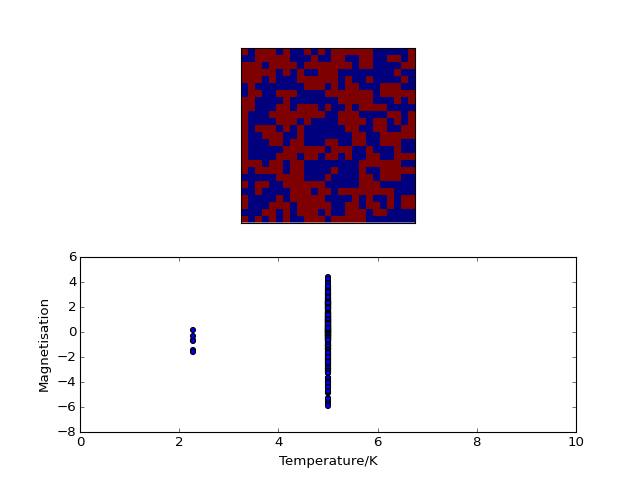

In [29]:
# Create a Grid with random distribution of spins

grid = (-1) ** np.random.randint(2, size=(N,N))

# Prepare figures for animation
fig = plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

# Presentation
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.set_xlim([0, 10])
ax2.set_xlabel('Temperature/K')
ax2.set_ylabel('Magnetisation')

# Image containing the lattice
im = ax1.imshow(grid, animated=True, interpolation='none')

def step(grid):
    """
    The Monte-Carlo step stage of the algorithm.
    
    Parameters
    ----------
    grid : array
        The lattice containing the particles.
    """
    # Select a random position on the grid
    i = np.random.randint(0,N)
    j = np.random.randint(0,N)
     
    E = -2. * energy(grid, i, j)

    # If energy change is negative, flip.
    if E <= 0.:
        grid[i][j] = -grid[i][j]
    # If energy change is positive, flip according to Boltzmann.
    elif boltzmann(E, T) > random.random():
        grid[i][j] = -grid[i][j]
    
    return grid

def animate(i):
    """
    Parameters
    ----------
    i : int
        The stage of the animation.
    """
    im.set_array(step(grid))
    # Measure the Magnetisation and Plot
    if i % R is 0:
        ax2.scatter(T, magnetisation(grid))
    return im,

ani = animation.FuncAnimation(fig, animate, frames=500, interval=1, blit=True)


Widgets for controlling the size of the grid and the temperature.
The Curie Temperature $T_c$ for the 2D Ising model is given by:

<center>$\frac{k_b T_c}{J} = \frac{2}{ln(2 + \sqrt(2))}$</center>

Which is approximately 2.269.

Below this temperature, one expects a phrase transition. Magnetic domains will begin to form. With support from the environment, it becomes increasingly more favourable to flip a spin to a higher energy state above this temperature. In this case, the net magnetisation drops to zero.

To determine the magnetisation accurately, one would need to run many simulations, rather than a live one.

In [30]:
""" Widgets for controlling the demonstration """
def set_t(Temperature):
    """
    Parameters
    ----------
    Temperature : float
        The new temperature of the system.
    """
    global T
    T = Temperature
widgets.interact(set_t,Temperature=(0.0,10.0,0.01))

def set_size(Size):
    """
    Parameters
    ----------
    Size : int
        Sets the new size of the lattice.
    """
    global N
    N = int(Size)
    plt.legend()
widgets.interact(set_size, Size=('25', '50', '100', '250', '500'))

button = widgets.Button(description="Restart")
display(button)
def on_button_clicked(b):
    """
    Generates a new random grid.
    """
    global grid
    grid = (-1) ** np.random.randint(2, size=(N,N))
    plt.legend()
    plt.show()
button.on_click(on_button_clicked)